In [1]:
# Install Slingshot from Bioconductor
#if (!requireNamespace("BiocManager", quietly = TRUE))
 #   install.packages("BiocManager")
#BiocManager::install("slingshot")


In [2]:
# Install and load required libraries
#if (!requireNamespace("BiocManager", quietly = TRUE))
 #   install.packages("BiocManager")
#BiocManager::install("slingshot")
#BiocManager::install("SingleCellExperiment")

#install.packages("Seurat")

# Load the libraries
library(Seurat)
library(slingshot)
library(SingleCellExperiment)
# Load the pbmc3k dataset
pbmc.data <- Read10X(data.dir = "./pbmc3k_data/filtered_gene_bc_matrices/hg19/")

Warning message:
“package ‘Seurat’ was built under R version 4.3.3”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.3.3”
Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: princurve

Loading required package: TrajectoryUtils

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiff

In [3]:
# Create a Seurat object
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [4]:
# Standard pre-processing
pbmc <- NormalizeData(pbmc)
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)
pbmc <- ScaleData(pbmc)
pbmc <- RunPCA(pbmc)
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)
pbmc <- RunUMAP(pbmc, dims = 1:10)

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  MALAT1, LTB, IL32, CD2, ACAP1, STK17A, CTSW, CD247, CCL5, GIMAP5 
	   AQP3, GZMA, CST7, TRAF3IP3, MAL, HOPX, ITM2A, GZMK, MYC, BEX2 
	   GIMAP7, ETS1, LDLRAP1, ZAP70, LYAR, RIC3, TNFAIP8, KLRG1, SAMD3, NKG7 
Negative:  CST3, TYROBP, LST1, AIF1, FTL, FCN1, LYZ, FTH1, S100A9, FCER1G 
	   TYMP, CFD, LGALS1, CTSS, S100A8, SERPINA1, LGALS2, SPI1, IFITM3, PSAP 
	   CFP, SAT1, IFI30, COTL1, S100A11, NPC2, LGALS3, GSTP1, PYCARD, NCF2 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DRA, HLA-DQB1, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DPB1, HLA-DMA, HLA-DQA2, HLA-DRB5, HLA-DPA1, HLA-DMB, FCRLA, HVCN1, LTB, BLNK 
	   KIAA0125, P2RX5, IRF8, IGLL5, SWAP70, ARHGAP24, SMIM14, PPP1R14A, FCRL2, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMA, GZMB, FGFBP2, CTSW, GNLY, GZMH, SPON2 
	   CCL4, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX, CTSC 
	   TTC38, S100A4, ANXA1,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2700
Number of edges: 97892

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8719
Number of communities: 9
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:25:25 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

13:25:25 Read 2700 rows and found 10 numeric columns

13:25:25 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

13:25:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:25:25 Writing NN index file to t

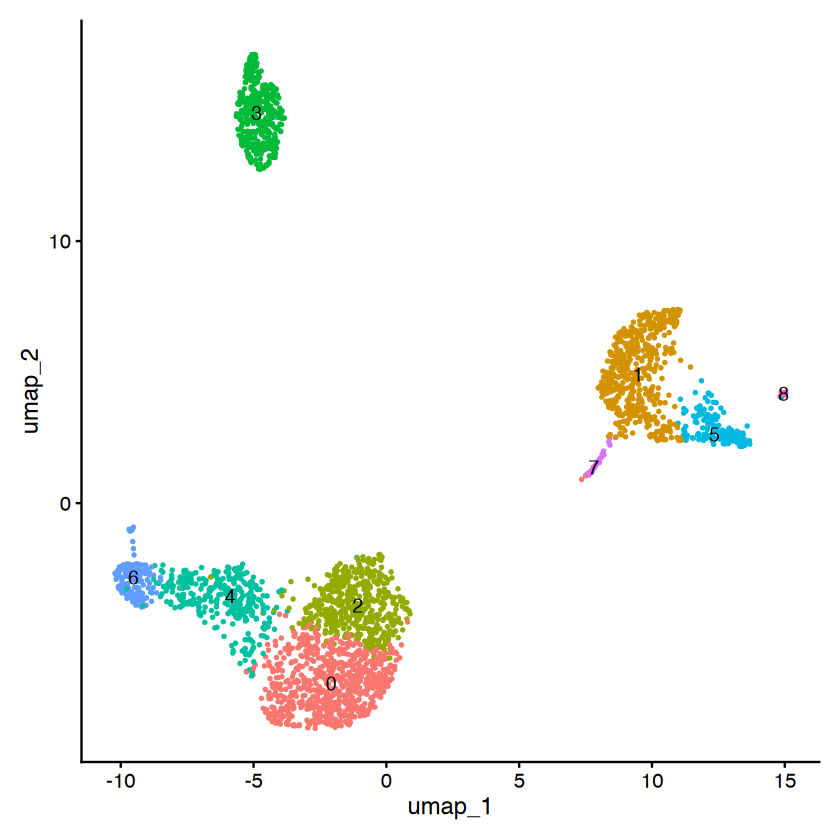

In [5]:
# Visualize the clusters
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

In [6]:
# Convert Seurat object to SingleCellExperiment object
sce <- as.SingleCellExperiment(pbmc)
# Perform Slingshot analysis
sce <- slingshot(sce, clusterLabels = 'seurat_clusters', reducedDim = 'UMAP')


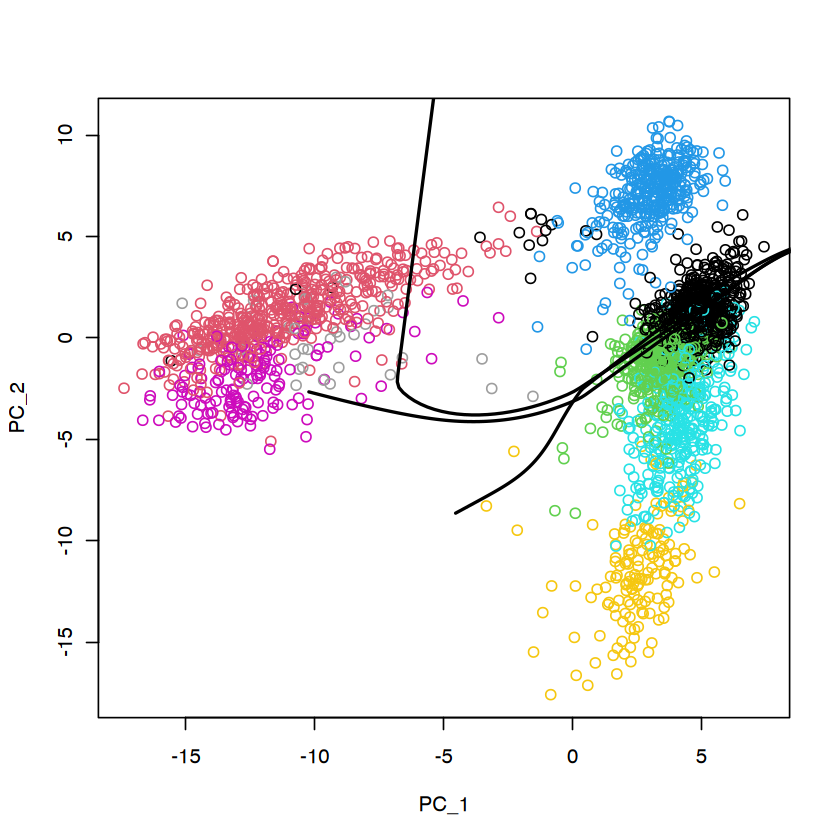

In [7]:
# Plot the results
plot(reducedDims(sce)$PCA, col = sce$seurat_clusters)
lines(SlingshotDataSet(sce), lwd = 2)


In [ ]:
#BiocManager::install(version = "3.17") # Ensure you have the latest Bioconductor version
#BiocManager::install("slingshot")
#BiocManager::install("SingleCellExperiment")

In [ ]:
# Update Bioconductor packages
#BiocManager::install(c("slingshot", "SingleCellExperiment", "matrixStats"), update = TRUE, ask = FALSE)
